# napari

In [1]:
import os

import napari
import pandas as pd
import tifffile

## File paths

Here we will specify that path from which to load the data. You just need to assign the path to the `napari-workshop` folder to `path_to_data_folder` and the paths to the files will be assigned.

Note: use the path with names and do not use variables such as `~` (e.g., use `/Users/my_user/` instead of `~`).

In [2]:
path_to_data_folder = os.path.join("/Users/kyamauch/", "Downloads", "napari-workshop")

# path the the multichannel image
img_file = os.path.join(path_to_data_folder, "img", "Patient4_005.tiff")

# path to the cell masks
mask_file = os.path.join(path_to_data_folder, "masks", "Patient4_005.tiff")

# path to the channel metadata table
panel_file = os.path.join(path_to_data_folder, "panel.csv")

## Data loading

Next load the images and the panel metadata

In [3]:
img = tifffile.imread(img_file)
print("Image shape:", img.shape)

mask = tifffile.imread(mask_file)
print("Mask shape:", mask.shape)

Image shape: (40, 600, 600)
Mask shape: (600, 600)


Load the panel metadata from the table. We extract the channel names (`channel_names`) from the table for naming the layers appropriately below.

In [4]:
panel = pd.read_csv(panel_file)
channel_names = panel.loc[panel["keep"] == 1, "name"]
print(len(channel_names), "channels in panel")

40 channels in panel


## Image visualization

Create the napari viewer and initialize it to display the axes and scale bar.

In [5]:
viewer = napari.Viewer()

# show the axes in the canvas and label the spatial dimensions
viewer.axes.visible = True
viewer.dims.axis_labels = ("y", "x")

# turn on the scale bar
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

Next, add the multichannel image. Some notes about the input arguments:

- `channel_axis`: tells napari it is a multichannel image and the channels are along axis 0. Each channel will be loaded as a separate layer. 
- `name`: each image layer will be given the name from the chanel metadata in the panel table.
- `visible`: we add the layers with such that they are not visible. This is for performance reasons. Having many layers visible simultaneously will slow napari down.

In [6]:
img_layers = viewer.add_image(
    data=img,
    channel_axis=0,
    name=channel_names,
    colormap="gray",
    blending="additive",
    visible=False,
)

Finally, add the cell segmentation masks as a labels layer. Labels layer is a special type of image that displays each label value as a different color. Generally this is used for displaying segmentation results and other categorical data.

In [7]:
mask_layer = viewer.add_labels(
    data=mask,
    name="Cells",
    blending="translucent",
    visible=False,
)

## Explore the data

Now you can explore the data in the viewer. You toggle layer visibility by clicking the "eye" button next to the layer in the layer list. As in the prevoius tutorial, you can adjust the contrast limits and colormap to best visualize you data.

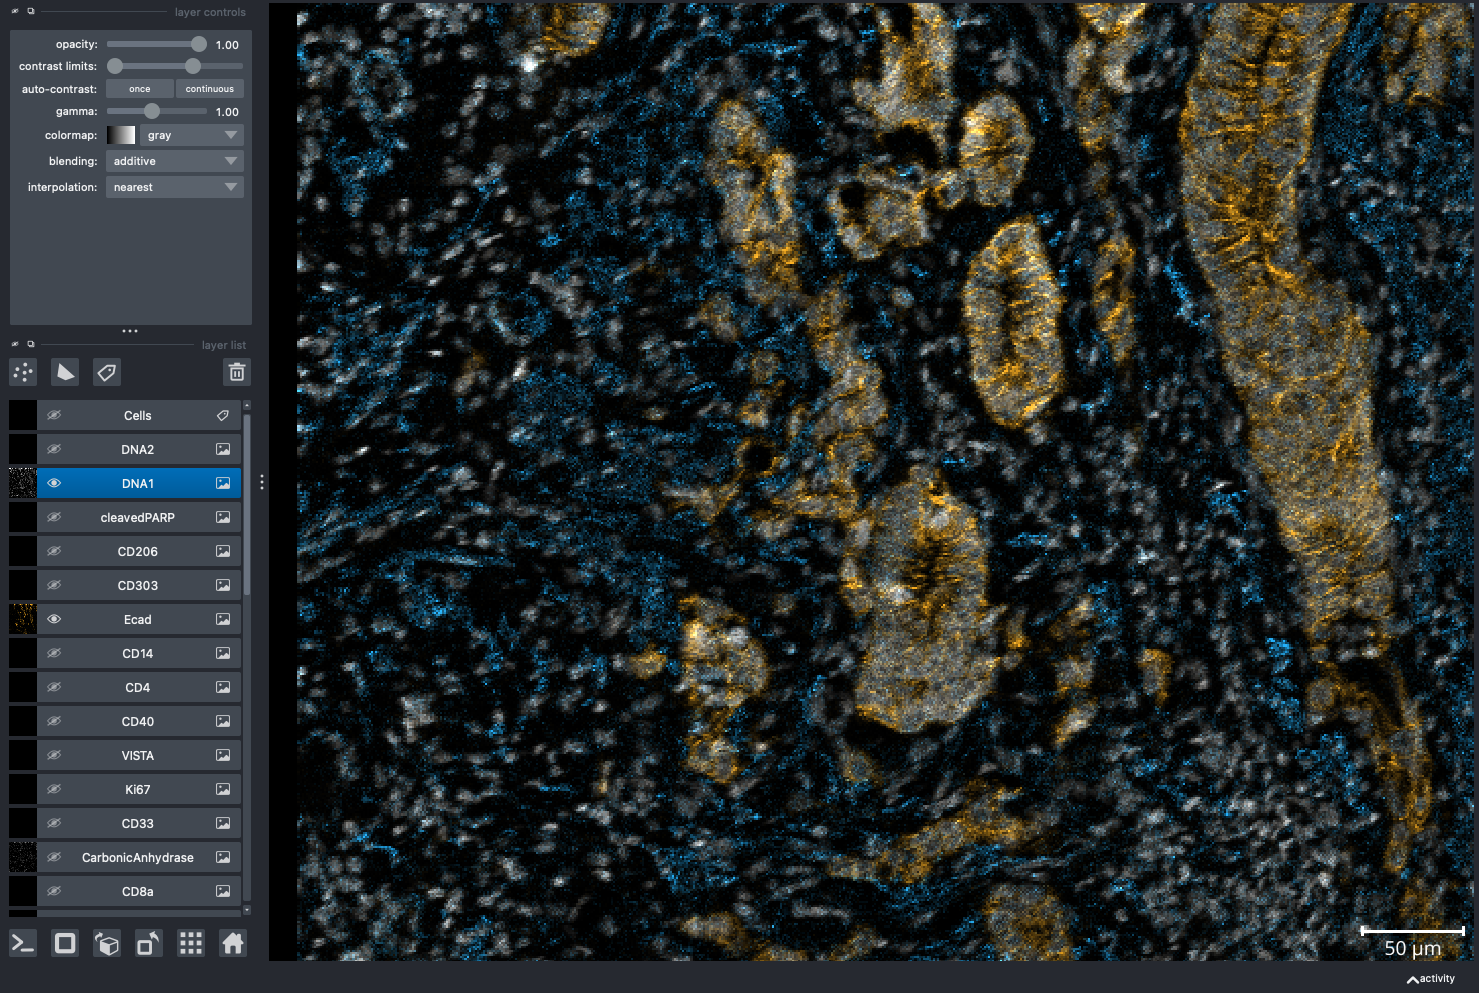

In [8]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)